<a href="https://colab.research.google.com/github/alirreza-qp/Type-Of-Model-Regression-For-Used-Cars/blob/main/Regression_models_for_used_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset download link:
https://drive.google.com/file/d/1FxskFczfgzkSToxZRrhQZTDE0YmMs8pW/view?usp=sharing

In [82]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Import Library and Read Dataset

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/used_cars.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### Exploration of the dataset

In [ ]:
df.head()
df.shape
df.columns   # ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type','transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque','seats']
df.dtypes
df.nunique()
df.info()
df.describe()                          # ['year', 'selling_price', 'km_driven','seats']
df.describe(exclude=[np.number])       # ['name','fuel', 'seller_type','transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque']
df.corr(numeric_only=True)
# df.corr()
# df.value_counts().to_frame()
# df["seller_type"].value_counts().to_frame()
# (df['mileage'].str.isnumeric()==False).sum()
# (df['mileage']=='?').sum()
# df[df['mileage']=='?']
# (df=='?').sum()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


1202

### Convert Data Types

In [ ]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [84]:
df['year'] = df['year'].astype('category')
df['fuel'] = df['fuel'].astype('category')
df['seller_type'] = df['seller_type'].astype('category')
df['transmission'] = df['transmission'].astype('category')
df['owner'] = df['owner'].astype('category')
# df['mileage'] = df['mileage'].astype('category')
# df['engine'] = df['engine'].astype('category')
# df['max_power'] = df['max_power'].astype('category')
# df['torque'] = df['torque'].astype('category')
df['seats'] = df['seats'].astype('category')
df.dtypes

name               object
year             category
selling_price       int64
km_driven           int64
fuel             category
seller_type      category
transmission     category
owner            category
mileage            object
engine             object
max_power          object
torque             object
seats            category
dtype: object

### Handling Missing Values

#### Check Null Values   =>  (NaN , None , '' , '?')

In [ ]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

#### Select Features By "select_dtypes" Method

In [85]:
df=df.drop(['name'],axis=1)

df_numeric_features = df.select_dtypes(include=['number'])
print(f"Numeric Features :\n{df_numeric_features}\n")

df_catagory_features= df.select_dtypes(include=['category'])
print(f"Categorical Features :\n{df_catagory_features}\n")

df_object_features= df.select_dtypes(include=['object'])
print(f"Object Features :\n{df_object_features}\n")


Numeric Features :
      selling_price  km_driven
0            450000     145500
1            370000     120000
2            158000     140000
3            225000     127000
4            130000     120000
...             ...        ...
8123         320000     110000
8124         135000     119000
8125         382000     120000
8126         290000      25000
8127         290000      25000

[8128 rows x 2 columns]

Categorical Features :
      year    fuel seller_type transmission                 owner seats
0     2014  Diesel  Individual       Manual           First Owner   5.0
1     2014  Diesel  Individual       Manual          Second Owner   5.0
2     2006  Petrol  Individual       Manual           Third Owner   5.0
3     2010  Diesel  Individual       Manual           First Owner   5.0
4     2007  Petrol  Individual       Manual           First Owner   5.0
...    ...     ...         ...          ...                   ...   ...
8123  2013  Petrol  Individual       Manual           Fi

#### Fill Missing Values By SimpleImputer Class

In [86]:
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(strategy='mean')     # strategy= 'mean'  |  'median'  |  'most_frequent'  |  'constant', fill_value=50
df_numeric_features = pd.DataFrame(imputer1.fit_transform(df_numeric_features), columns=df_numeric_features.columns)


imputer2 = SimpleImputer(strategy='most_frequent')
df_catagory_features = pd.DataFrame(imputer2.fit_transform(df_catagory_features), columns=df_catagory_features.columns)

imputer3 = SimpleImputer(strategy='most_frequent')
df_object_features = pd.DataFrame(imputer3.fit_transform(df_object_features), columns=df_object_features.columns)



#### Concatenation of All Dataframes





In [87]:
df_numeric_features.reset_index(drop=True, inplace=True)
df_catagory_features.reset_index(drop=True, inplace=True)
df_object_features.reset_index(drop=True, inplace=True)

df = pd.concat([df_numeric_features, df_catagory_features,df_object_features], axis=1)
df.head()


,selling_price,km_driven,year,fuel,seller_type,transmission,owner,seats,mileage,engine,max_power,torque
0,450000.0,145500.0,2014,Diesel,Individual,Manual,First Owner,5.0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
1,370000.0,120000.0,2014,Diesel,Individual,Manual,Second Owner,5.0,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm
2,158000.0,140000.0,2006,Petrol,Individual,Manual,Third Owner,5.0,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)"
3,225000.0,127000.0,2010,Diesel,Individual,Manual,First Owner,5.0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm
4,130000.0,120000.0,2007,Petrol,Individual,Manual,First Owner,5.0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)"


#### Drop Duplicated Data

In [88]:

df.duplicated().sum()
df=df.drop_duplicates()
df

,selling_price,km_driven,year,fuel,seller_type,transmission,owner,seats,mileage,engine,max_power,torque
0,450000.0,145500.0,2014,Diesel,Individual,Manual,First Owner,5.0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
1,370000.0,120000.0,2014,Diesel,Individual,Manual,Second Owner,5.0,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm
2,158000.0,140000.0,2006,Petrol,Individual,Manual,Third Owner,5.0,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)"
3,225000.0,127000.0,2010,Diesel,Individual,Manual,First Owner,5.0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm
4,130000.0,120000.0,2007,Petrol,Individual,Manual,First Owner,5.0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)"
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,260000.0,50000.0,2013,Petrol,Individual,Manual,Second Owner,5.0,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm
8122,475000.0,80000.0,2014,Diesel,Individual,Manual,Second Owner,5.0,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm
8123,320000.0,110000.0,2013,Petrol,Individual,Manual,First Owner,5.0,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm
8124,135000.0,119000.0,2007,Diesel,Individual,Manual,Fourth & Above Owner,5.0,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)"


### Encoding Categorical Features

#### Use LabelEncoder

In [89]:
from sklearn.preprocessing import LabelEncoder

df.nunique()
le=LabelEncoder()

for col in df_catagory_features:
  df[col]=le.fit_transform(df[col])
df

for col in df_object_features:
  df[col]=le.fit_transform(df[col])
df


,selling_price,km_driven,year,fuel,seller_type,transmission,owner,seats,mileage,engine,max_power,torque
0,450000.0,145500.0,22,1,1,1,0,2,335,13,244,178
1,370000.0,120000.0,22,1,1,1,2,2,284,36,15,260
2,158000.0,140000.0,14,3,1,1,4,2,180,35,253,66
3,225000.0,127000.0,18,1,1,1,0,2,327,24,297,224
4,130000.0,120000.0,15,3,1,1,0,2,136,14,288,21
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,260000.0,50000.0,21,3,1,1,2,2,210,119,224,424
8122,475000.0,80000.0,22,1,1,1,2,2,318,24,292,221
8123,320000.0,110000.0,21,3,1,1,0,2,202,10,267,37
8124,135000.0,119000.0,15,1,1,1,1,2,154,32,30,250


In [ ]:
df.dtypes


selling_price    float64
km_driven        float64
year               int64
fuel               int64
seller_type        int64
transmission       int64
owner              int64
seats              int64
mileage            int64
engine             int64
max_power          int64
torque             int64
dtype: object

### Handeling Outlier values

#### Outliers Detection

##### By Zscore

In [90]:
import scipy.stats as stats

def add_zscore_col(colname):
  df['zscore_'+colname] = stats.zscore(df[colname])
  return df

df=add_zscore_col('selling_price')
df=add_zscore_col('km_driven')
df=add_zscore_col('year')
# df=add_zscore_col('fuel')
# df=add_zscore_col('seller_type')
# df=add_zscore_col('transmission')
# df=add_zscore_col('owner')
# df=add_zscore_col('seats')
# df=add_zscore_col('mileage')
# df=add_zscore_col('engine')
# df=add_zscore_col('max_power')
# df=add_zscore_col('torque')
df
# selling_price	km_driven	year	fuel	seller_type	transmission	owner	seats	mileage	engine	max_power	torque	zscore_year	zscore_selling_price


,selling_price,km_driven,year,fuel,seller_type,transmission,owner,seats,mileage,engine,max_power,torque,zscore_selling_price,zscore_km_driven,zscore_year
0,450000.0,145500.0,22,1,1,1,0,2,335,13,244,178,-0.129624,1.225104,0.142907
1,370000.0,120000.0,22,1,1,1,2,2,284,36,15,260,-0.283376,0.788135,0.142907
2,158000.0,140000.0,14,3,1,1,4,2,180,35,253,66,-0.690818,1.130855,-1.822362
3,225000.0,127000.0,18,1,1,1,0,2,327,24,297,224,-0.562051,0.908087,-0.839728
4,130000.0,120000.0,15,3,1,1,0,2,136,14,288,21,-0.744632,0.788135,-1.576703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,260000.0,50000.0,21,3,1,1,2,2,210,119,224,424,-0.494785,-0.411387,-0.102752
8122,475000.0,80000.0,22,1,1,1,2,2,318,24,292,221,-0.081576,0.102694,0.142907
8123,320000.0,110000.0,21,3,1,1,0,2,202,10,267,37,-0.379471,0.616775,-0.102752
8124,135000.0,119000.0,15,1,1,1,1,2,154,32,30,250,-0.735022,0.770999,-1.576703


In [91]:
def show_outliers(colname):
  outlier=df[(df[colname]<-3) | (3 <df[colname])]
  return outlier


outliers = show_outliers('zscore_selling_price') # 107
outliers = show_outliers('zscore_km_driven')     # 60
outliers = show_outliers('zscore_year')          # 77
# outliers = show_outliers('zscore_fuel')          # 0
# outliers = show_outliers('zscore_seller_type')   # 27
# outliers = show_outliers('zscore_transmission')  # 584
# outliers = show_outliers('zscore_owner')         # 0
# outliers = show_outliers('zscore_seats')         # 93
# outliers = show_outliers('zscore_mileage')       # 0
# outliers = show_outliers('zscore_engine')        # 0
# outliers = show_outliers('zscore_max_power')     # 0
# outliers = show_outliers('zscore_torque')        # 0
outliers
# selling_price	km_driven	year	fuel	seller_type	transmission	owner	seats	mileage	engine	max_power	torque



,selling_price,km_driven,year,fuel,seller_type,transmission,owner,seats,mileage,engine,max_power,torque,zscore_selling_price,zscore_km_driven,zscore_year
7,45000.0,5000.0,9,3,1,1,2,1,136,112,172,388,-0.907993,-1.182508,-3.050654
177,40000.0,40000.0,7,3,1,1,2,1,136,112,172,388,-0.917602,-0.582747,-3.541972
186,100000.0,60000.0,8,3,1,1,0,2,202,112,186,403,-0.802289,-0.240027,-3.296313
316,300000.0,10000.0,0,1,1,1,4,2,210,13,244,178,-0.417909,-1.096828,-5.261581
774,80000.0,110000.0,7,3,1,1,2,2,210,13,244,178,-0.840727,0.616775,-3.541972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7958,45957.0,90000.0,8,3,1,1,2,2,238,112,180,398,-0.906154,0.274054,-3.296313
7996,140000.0,50000.0,8,3,1,1,2,2,210,13,244,178,-0.725413,-0.411387,-3.296313
8025,35000.0,40000.0,6,3,1,1,2,1,136,112,172,388,-0.927212,-0.582747,-3.787630
8042,300000.0,186388.0,5,3,1,1,2,5,96,14,257,8,-0.417909,1.925761,-4.033289


##### Show Box Plot For Outliers

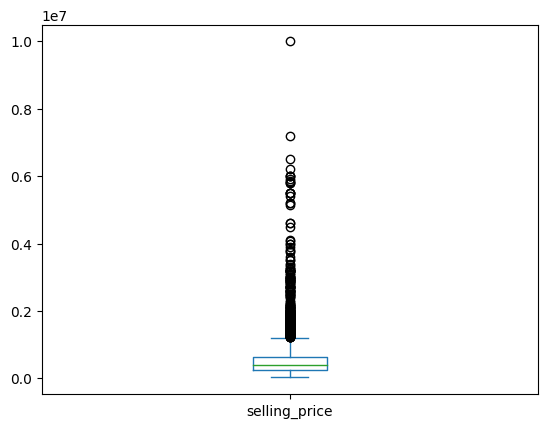

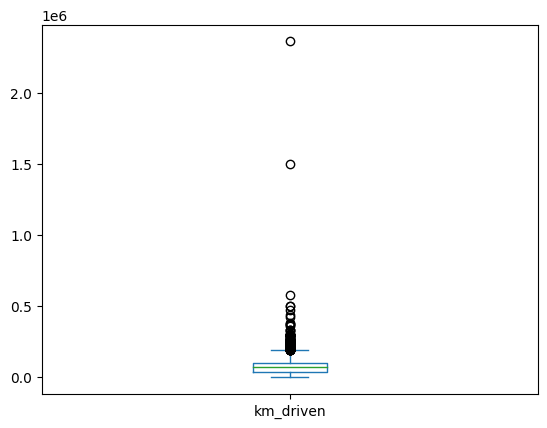

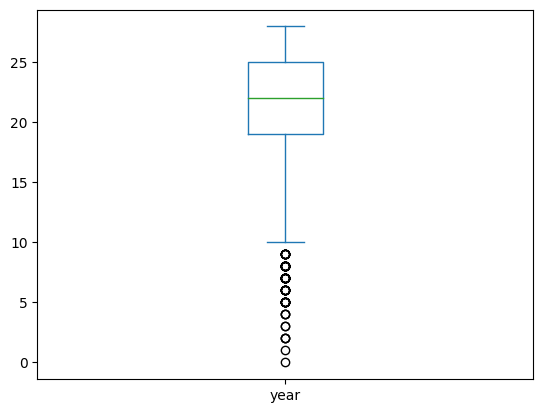

In [92]:
# ['year', 'selling_price', 'km_driven','seats']
def Show_Box_Plot_For_Outliers(colname):
  df[colname].plot(kind='box')
  plt.show()

Show_Box_Plot_For_Outliers('selling_price')
Show_Box_Plot_For_Outliers('km_driven')
Show_Box_Plot_For_Outliers('year')
# Show_Box_Plot_For_Outliers('fuel')
# Show_Box_Plot_For_Outliers('seller_type')
# Show_Box_Plot_For_Outliers('transmission')
# Show_Box_Plot_For_Outliers('owner')
# Show_Box_Plot_For_Outliers('seats')
# Show_Box_Plot_For_Outliers('mileage')
# Show_Box_Plot_For_Outliers('engine')
# Show_Box_Plot_For_Outliers('max_power')
# Show_Box_Plot_For_Outliers('torque')


#### Drop Records Containing Outliers

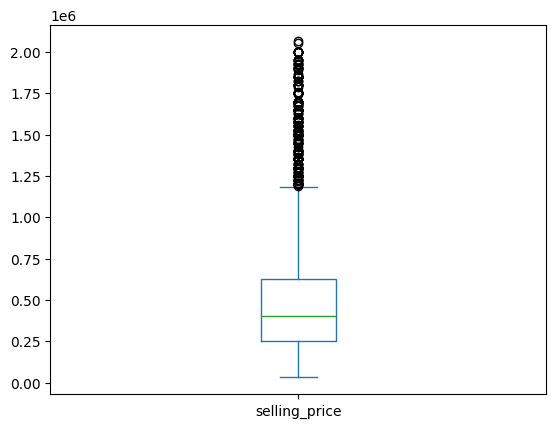

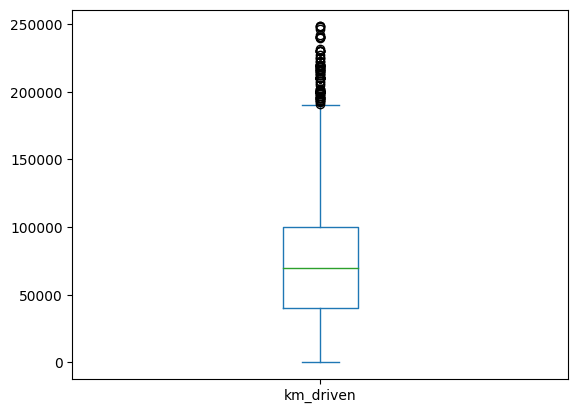

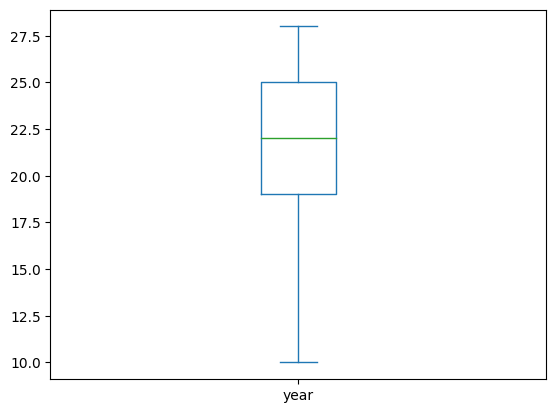

(6665, 15)

In [93]:
def drop_outliers(df,colname):
  df=df[(-3< df[colname]) & (df[colname]<3)]
  return df
# selling_price	km_driven	year	fuel	seller_type	transmission	owner	seats	mileage	engine	max_power	torque
df=drop_outliers(df,'zscore_selling_price')
df=drop_outliers(df,'zscore_km_driven')
df=drop_outliers(df,'zscore_year')
# df=drop_outliers(df,'zscore_fuel')
# df=drop_outliers(df,'zscore_seller_type')
# df=drop_outliers(df,'zscore_transmission')
# df=drop_outliers(df,'zscore_owner')
# df=drop_outliers(df,'zscore_seats')
# df=drop_outliers(df,'zscore_mileage')
# df=drop_outliers(df,'zscore_engine')
# df=drop_outliers(df,'zscore_max_power')
# df=drop_outliers(df,'zscore_torque')


df.shape
Show_Box_Plot_For_Outliers('selling_price')
Show_Box_Plot_For_Outliers('km_driven')
Show_Box_Plot_For_Outliers('year')
# Show_Box_Plot_For_Outliers('fuel')
# Show_Box_Plot_For_Outliers('seller_type')
# Show_Box_Plot_For_Outliers('transmission')
# Show_Box_Plot_For_Outliers('owner')
# Show_Box_Plot_For_Outliers('seats')
# Show_Box_Plot_For_Outliers('mileage')
# Show_Box_Plot_For_Outliers('engine')
# Show_Box_Plot_For_Outliers('max_power')
# Show_Box_Plot_For_Outliers('torque')
df
df.shape

In [94]:
def drop_zscore_col(df,colname):
  df=df.drop([colname],axis=1)
  return df

df=drop_zscore_col(df,'zscore_selling_price')
df=drop_zscore_col(df,'zscore_km_driven')
df=drop_zscore_col(df,'zscore_year')
# df=drop_zscore_col(df,'zscore_fuel')
# df=drop_zscore_col(df,'zscore_seller_type')
# df=drop_zscore_col(df,'zscore_transmission')
# df=drop_zscore_col(df,'zscore_owner')
# df=drop_zscore_col(df,'zscore_seats')
# df=drop_zscore_col(df,'zscore_mileage')
# df=drop_zscore_col(df,'zscore_engine')
# df=drop_zscore_col(df,'zscore_max_power')
# df=drop_zscore_col(df,'zscore_torque')
df

# selling_price	km_driven	year	fuel	seller_type	transmission	owner	seats	mileage	engine	max_power	torque

,selling_price,km_driven,year,fuel,seller_type,transmission,owner,seats,mileage,engine,max_power,torque
0,450000.0,145500.0,22,1,1,1,0,2,335,13,244,178
1,370000.0,120000.0,22,1,1,1,2,2,284,36,15,260
2,158000.0,140000.0,14,3,1,1,4,2,180,35,253,66
3,225000.0,127000.0,18,1,1,1,0,2,327,24,297,224
4,130000.0,120000.0,15,3,1,1,0,2,136,14,288,21
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,260000.0,50000.0,21,3,1,1,2,2,210,119,224,424
8122,475000.0,80000.0,22,1,1,1,2,2,318,24,292,221
8123,320000.0,110000.0,21,3,1,1,0,2,202,10,267,37
8124,135000.0,119000.0,15,1,1,1,1,2,154,32,30,250


### Transformation and Column Distributions and Skew

In [95]:
def log_sqrt(df,colname):
  df['Log_'+colname] = np.log(df[colname])
  df['Sqrt_'+colname] = np.sqrt(df[colname])
  return df

df=log_sqrt(df,'selling_price')
df=log_sqrt(df,'km_driven')
df=log_sqrt(df,'year')
# df=log_sqrt(df,'fuel')
# df=log_sqrt(df,'seller_type')
# df=log_sqrt(df,'transmission')
# df=log_sqrt(df,'owner')
# df=log_sqrt(df,'seats')
# df=log_sqrt(df,'mileage')
# df=log_sqrt(df,'engine')
# df=log_sqrt(df,'max_power')
# df=log_sqrt(df,'torque')

df.head()

,selling_price,km_driven,year,fuel,seller_type,transmission,owner,seats,mileage,engine,max_power,torque,Log_selling_price,Sqrt_selling_price,Log_km_driven,Sqrt_km_driven,Log_year,Sqrt_year
0,450000.0,145500.0,22,1,1,1,0,2,335,13,244,178,13.017003,670.820393,11.887931,381.444622,3.091042,4.690416
1,370000.0,120000.0,22,1,1,1,2,2,284,36,15,260,12.821258,608.276253,11.695247,346.410162,3.091042,4.690416
2,158000.0,140000.0,14,3,1,1,4,2,180,35,253,66,11.970350,397.492138,11.849398,374.165739,2.639057,3.741657
3,225000.0,127000.0,18,1,1,1,0,2,327,24,297,224,12.323856,474.341649,11.751942,356.370594,2.890372,4.242641
4,130000.0,120000.0,15,3,1,1,0,2,136,14,288,21,11.775290,360.555128,11.695247,346.410162,2.708050,3.872983


In [96]:
from scipy.stats import skew

def show_skewness(df,colname):
    print(f"{colname} Skewness : {skew(df[colname])}")
    print(f"Log_{colname} Skewness : {skew(df['Log_'+colname])}")
    print(f"Sqrt_{colname} Skewness : {skew(df['Sqrt_'+colname])}")
    print("-------------------------------------------------------------------")

show_skewness(df,'selling_price') #sqrt
show_skewness(df,'km_driven')     #sqrt
show_skewness(df,'year')          #self
# show_skewness(df,'fuel')          #sqrt
# show_skewness(df,'seller_type')   #sqrt
# show_skewness(df,'transmission')  #nan
# show_skewness(df,'owner')         #sqrt
# show_skewness(df,'seats')         #sqrt
# show_skewness(df,'mileage')       #self
# show_skewness(df,'engine')        #sqrt
# show_skewness(df,'max_power')     #self
# show_skewness(df,'torque')        #self


selling_price Skewness : 1.6089974887151433
Log_selling_price Skewness : -0.42191839204804066
Sqrt_selling_price Skewness : 0.5682492264672632
-------------------------------------------------------------------
km_driven Skewness : 0.7806573868538924
Log_km_driven Skewness : -1.5359649880916708
Sqrt_km_driven Skewness : -0.061054012281374394
-------------------------------------------------------------------
year Skewness : -0.630714459405732
Log_year Skewness : -1.1338055850375324
Sqrt_year Skewness : -0.864803081585838
-------------------------------------------------------------------


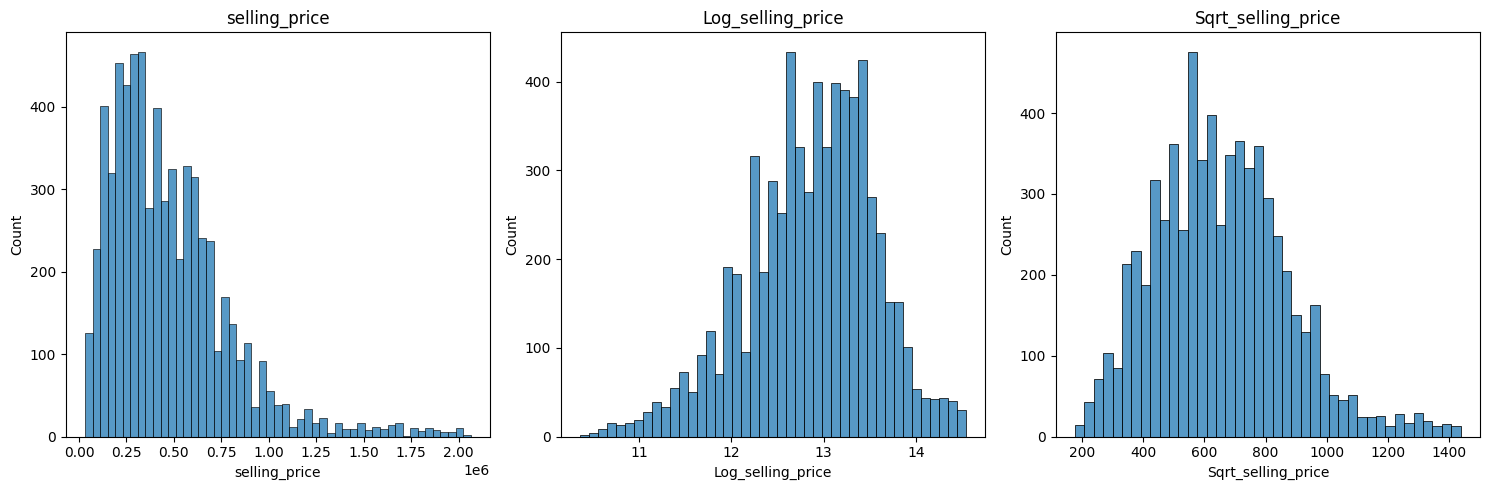

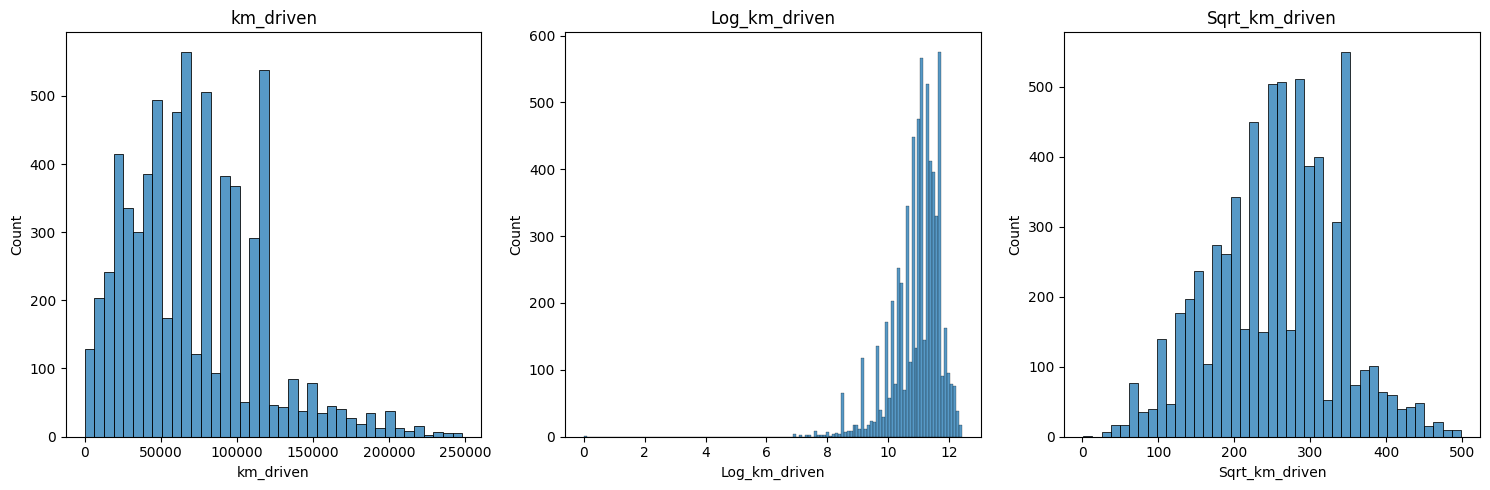

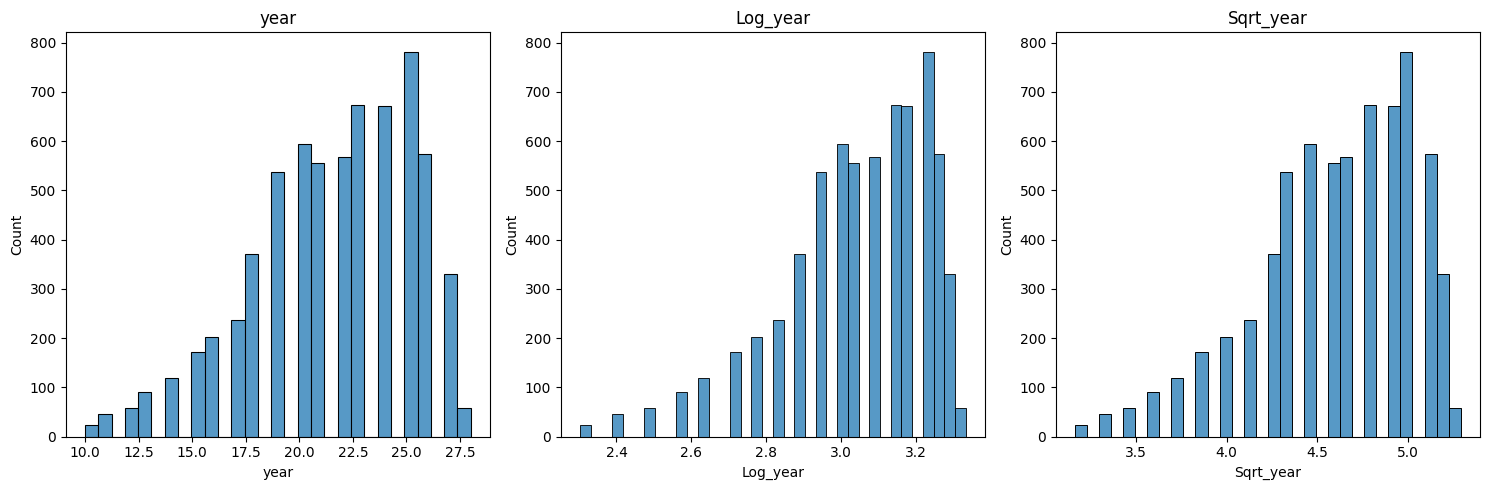

In [97]:

def show_plot_for_log_sqrt(df,colname):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    sns.histplot(x=df[colname], ax=axes[0])
    sns.histplot(x=df['Log_'+colname], ax=axes[1])
    sns.histplot(x=df['Sqrt_'+colname], ax=axes[2])

    axes[0].set_title(colname)
    axes[1].set_title('Log_'+colname)
    axes[2].set_title('Sqrt_'+colname)

    plt.tight_layout()
    plt.show()

show_plot_for_log_sqrt(df,'selling_price') #sqrt
show_plot_for_log_sqrt(df,'km_driven')     #sqrt
show_plot_for_log_sqrt(df,'year')          #self
# show_plot_for_log_sqrt(df,'fuel')          #sqrt
# show_plot_for_log_sqrt(df,'seller_type')   #self
# show_plot_for_log_sqrt(df,'transmission')  #nan
# show_plot_for_log_sqrt(df,'owner')         #sqrt
# show_plot_for_log_sqrt(df,'seats')         #sqrt
# show_plot_for_log_sqrt(df,'mileage')       #self
# show_plot_for_log_sqrt(df,'engine')        #sqrt
# show_plot_for_log_sqrt(df,'max_power')     #self
# show_plot_for_log_sqrt(df,'torque')        #self


In [98]:
def keep_sqrt_col(df,colname):
    df = df.drop(columns=['Log_'+colname,colname])
    df=df.rename(columns={'Sqrt_'+colname: colname})
    return df

def keep_log_col(df,colname):
    df = df.drop(columns=['Sqrt_'+colname,colname])
    df=df.rename(columns={'Log_'+colname: colname})
    return df

def keep_self_col(df,colname):
    df = df.drop(columns=['Sqrt_'+colname,'Log_'+colname])
    return df

df=keep_log_col(df,'selling_price') #log

df=keep_sqrt_col(df,'km_driven')     #sqrt
# df=keep_sqrt_col(df,'fuel')          #sqrt
# df=keep_sqrt_col(df,'owner')         #sqrt
# df=keep_sqrt_col(df,'seats')         #sqrt
# df=keep_sqrt_col(df,'engine')        #sqrt

# df=keep_self_col(df,'max_power')     #self
# df=keep_self_col(df,'torque')        #self
df=keep_self_col(df,'year')          #self
# df=keep_self_col(df,'mileage')       #self
# df=keep_self_col(df,'seller_type')   #self
# df=keep_self_col(df,'transmission')  #nan

df.head()

,year,fuel,seller_type,transmission,owner,seats,mileage,engine,max_power,torque,selling_price,km_driven
0,22,1,1,1,0,2,335,13,244,178,13.017003,381.444622
1,22,1,1,1,2,2,284,36,15,260,12.821258,346.410162
2,14,3,1,1,4,2,180,35,253,66,11.970350,374.165739
3,18,1,1,1,0,2,327,24,297,224,12.323856,356.370594
4,15,3,1,1,0,2,136,14,288,21,11.775290,346.410162


### Data Visualization

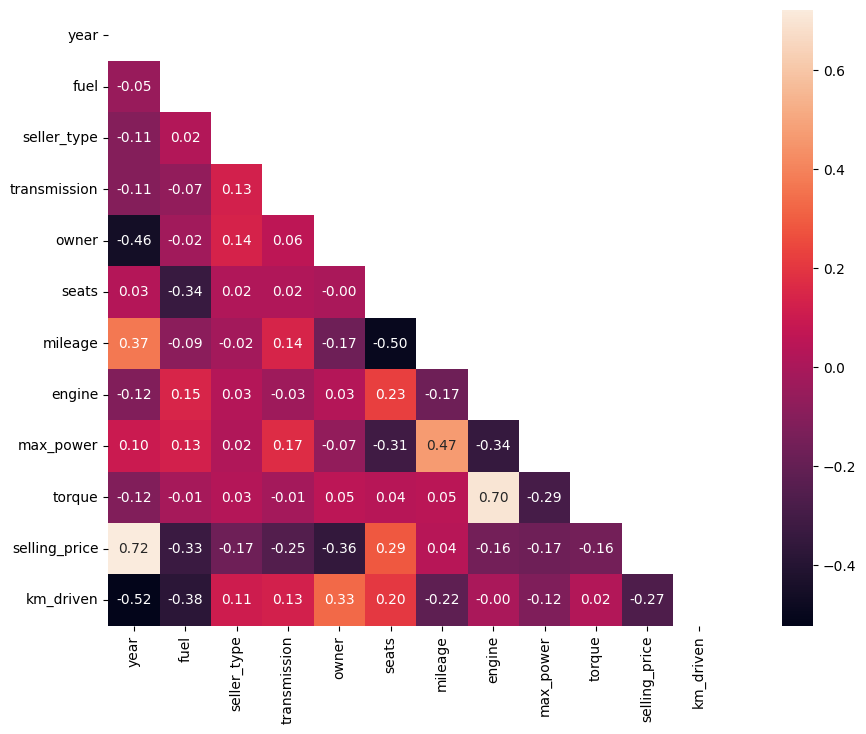

In [99]:
plt.figure(figsize=(15,8))
corr = df.corr()
mask = np.triu(corr)
sns.heatmap(corr,square=True, mask= mask, annot= True, fmt = '.2f')
plt.show()

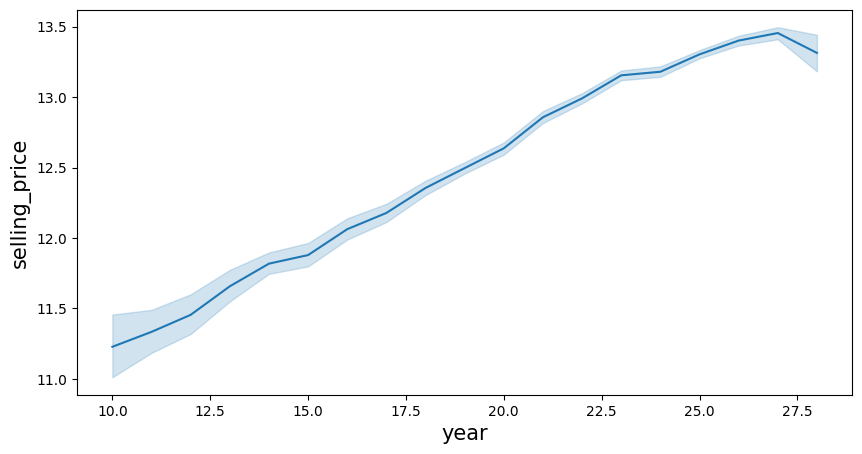

In [100]:
plt.figure(figsize=(10,5))
plt.xlabel("year", fontsize = 15)
plt.ylabel("selling_price", fontsize = 15)
sns.lineplot(x = 'year', y = 'selling_price', data = df);

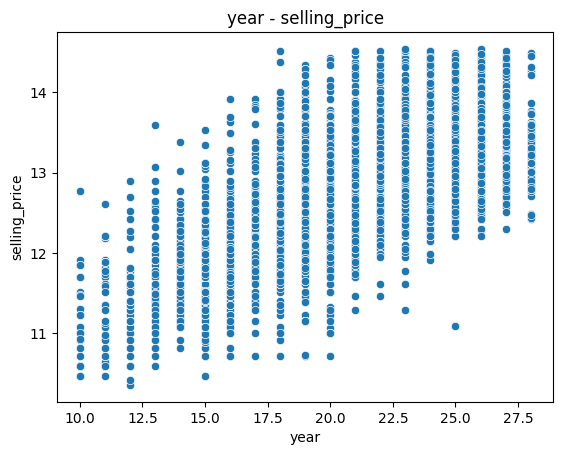

In [101]:
sns.scatterplot(x = 'year',y = 'selling_price',  data = df)
plt.title("year - selling_price")
plt.xlabel("year")
plt.ylabel("selling_price")
plt.show()

### Scaling the Numerical Features (Standardization and Normalization)

#### Standardization

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()

,year,fuel,seller_type,transmission,owner,seats,mileage,engine,max_power,torque,selling_price,km_driven
0,0.116933,-0.891133,0.299155,0.279518,-0.716512,-0.435628,1.098647,-0.811770,0.491506,-0.272285,0.239403,1.512658
1,0.116933,-0.891133,0.299155,0.279518,0.875604,-0.435628,0.576466,-0.235858,-2.065843,0.367840,-0.040735,1.093853
2,-2.014641,1.100953,0.299155,0.279518,2.467721,-0.435628,-0.488374,-0.260897,0.592013,-1.146601,-1.258505,1.425646
3,-0.948854,-0.891133,0.299155,0.279518,-0.716512,-0.435628,1.016736,-0.536334,1.083381,0.086810,-0.752589,1.212921
4,-1.748195,1.100953,0.299155,0.279518,-0.716512,-0.435628,-0.938882,-0.786730,0.982874,-1.497889,-1.537664,1.093853


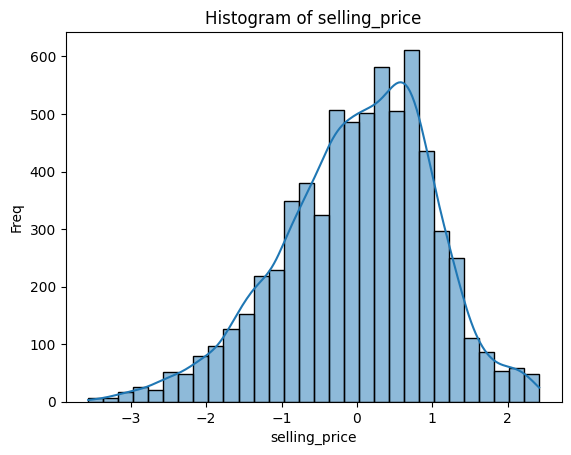

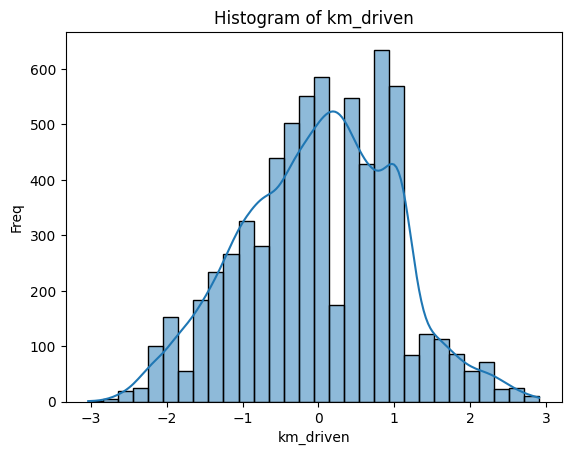

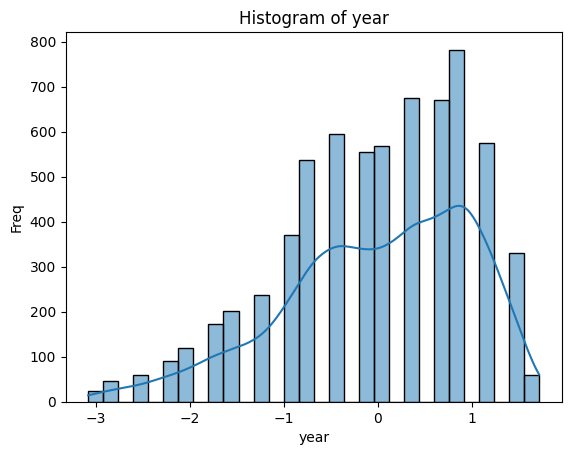

In [ ]:
def show_histplot(df,colname):
    sns.histplot(df[colname], bins=30, kde=True)
    plt.title('Histogram of '+colname)
    plt.xlabel(colname)
    plt.ylabel('Freq')
    plt.show()

show_histplot(df,'selling_price')
show_histplot(df,'km_driven')
show_histplot(df,'year')
# show_histplot(df,'fuel')
# show_histplot(df,'seller_type')
# show_histplot(df,'transmission')
# show_histplot(df,'owner')
# show_histplot(df,'seats')
# show_histplot(df,'mileage')
# show_histplot(df,'engine')
# show_histplot(df,'max_power')
# show_histplot(df,'torque')



### Divide the data into training and test data

In [ ]:
df.head()

,km_driven,year,fuel,seller_type,transmission,owner,seats,mileage,engine,max_power,torque,selling_price,zscore_year,zscore_selling_price
0,145500.0,22,1,1,1,0,2,335,13,244,178,13.017003,0.124874,0.239733
1,120000.0,22,1,1,1,2,2,284,36,15,260,12.821258,0.124874,-0.040637
2,140000.0,14,3,1,1,4,2,180,35,253,66,11.970350,-2.001852,-1.259414
3,127000.0,18,1,1,1,0,2,327,24,297,224,12.323856,-0.938489,-0.753080
4,120000.0,15,3,1,1,0,2,136,14,288,21,11.775290,-1.736011,-1.538805


In [179]:
from sklearn.model_selection import train_test_split
X = df.drop('selling_price', axis=1)
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8, random_state =42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

,year,fuel,seller_type,transmission,owner,seats,mileage,engine,max_power,torque,km_driven
263,-0.415961,-0.891133,0.299155,0.279518,-0.716512,-0.435628,-0.058342,-0.811770,0.458003,-0.272285,0.917558
2557,0.116933,-0.891133,0.299155,0.279518,-0.716512,-0.435628,1.446767,-0.235858,1.262061,-0.155189,0.539062
7431,1.182720,-0.891133,0.299155,0.279518,-0.716512,-0.435628,1.334140,-0.811770,0.994042,-0.155189,-2.201884
2923,-0.415961,-0.891133,0.299155,0.279518,0.875604,2.706646,-2.003722,0.640531,-1.708484,0.578613,0.768849
6656,0.649826,1.100953,0.299155,0.279518,2.467721,-0.435628,-0.181208,-0.886889,0.714855,-1.271503,-0.218311
...,...,...,...,...,...,...,...,...,...,...,...
391,-1.215301,1.100953,0.299155,-3.577593,0.875604,-0.435628,-2.198260,0.790769,-1.127776,0.024359,1.093853
6242,0.916273,-0.891133,0.299155,0.279518,-0.716512,-0.435628,1.497962,-0.811770,0.491506,-0.272285,0.000542
1251,-0.682408,-0.891133,0.299155,0.279518,-0.716512,-0.435628,0.996258,-0.811770,0.491506,-0.272285,2.430887
2703,0.649826,1.100953,0.299155,0.279518,-0.716512,-0.435628,-0.181208,-0.886889,0.714855,-1.271503,-0.656347


### Regression Models

#### Single Linear Regression

MSE: 0.5128366102540713
R2: 0.5013907481450175


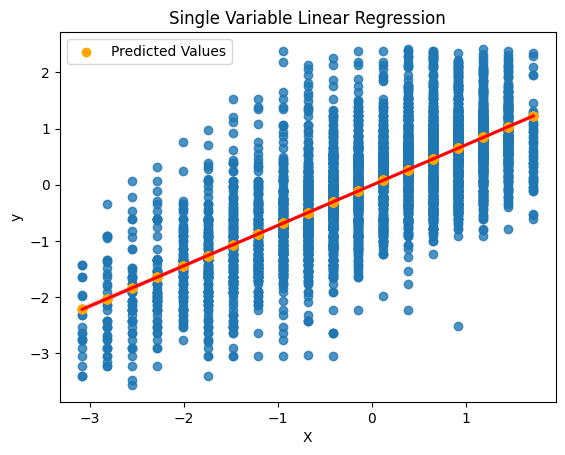

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# year	km_driven	seats	fuel	seller_type	transmission	owner	mileage	engine	max_power	torque
X_train_single = X_train[['year']]
X_test_single = X_test[['year']]

slr_model = LinearRegression()
slr_model.fit(X_train_single, y_train)

y_pred_single = slr_model.predict(X_test_single)

mse_single = mean_squared_error(y_test, y_pred_single)
r2_single = r2_score(y_test, y_pred_single)

print(f"MSE: {mse_single}")
print(f"R2: {r2_single}")

sns.regplot(x=X_train_single, y=y_train, data=df, line_kws={"color": "red"})
plt.scatter(x=X_test_single, y=y_pred_single, color='orange', label='Predicted Values')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Single Variable Linear Regression')
plt.legend()

plt.show()



#### Multiple Linear Regression

MSE: 0.2786470640142854
R2: 0.7290832960405886


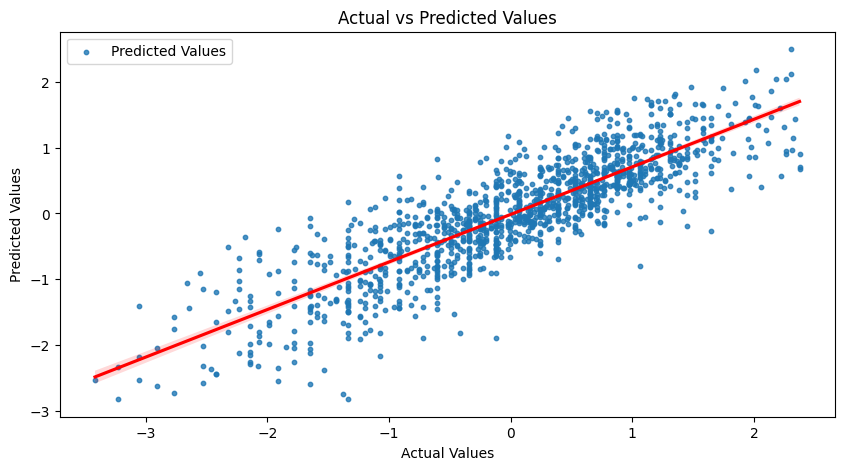

In [213]:
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

y_pred_multi = mlr_model.predict(X_test)

mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f"MSE: {mse_multi}")
print(f"R2: {r2_multi}")
# print(mlr_model.score(X_train, y_train))
# print(mlr_model.score(X_test, y_test))
#

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_multi})


# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))

sns.regplot(x='Actual', y='Predicted', data=results, scatter_kws={'s': 10},line_kws={"color": "red"} , label='Predicted Values')
# plt.plot([min(results['Actual']), max(results['Actual'])], [min(results['Actual']), max(results['Actual'])], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()




#### Polynomial Regression

Polynomial Regression (Degree 2) - MSE: 0.1733710772199506, R2: 0.8314386660829355


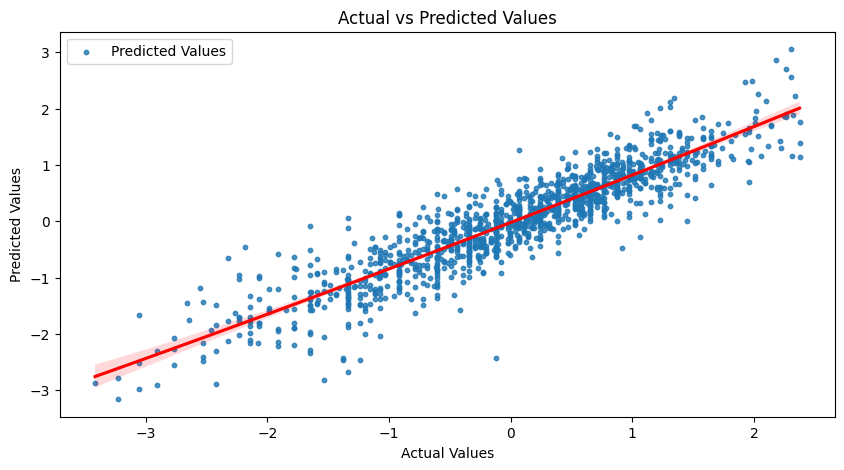

In [164]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_features = PolynomialFeatures(degree=2)
poly_model = make_pipeline(poly_features, LinearRegression())

poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (Degree {2}) - MSE: {mse_poly}, R2: {r2_poly}")

# print(poly_model.score(X_train, y_train))
# print(poly_model.score(X_test, y_test))
# ----------------------------------------------------------------
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_poly})


# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
sns.regplot(x='Actual', y='Predicted', data=results, order=2, scatter_kws={'s': 10},line_kws={"color": "red"} , label='Predicted Values')
# plt.plot([min(results['Actual']), max(results['Actual'])], [min(results['Actual']), max(results['Actual'])], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


#### Ridge Regression

Ridge Regression (alpha : 0.3) - MSE: 0.2786471297432879, R2: 0.7290832321350715


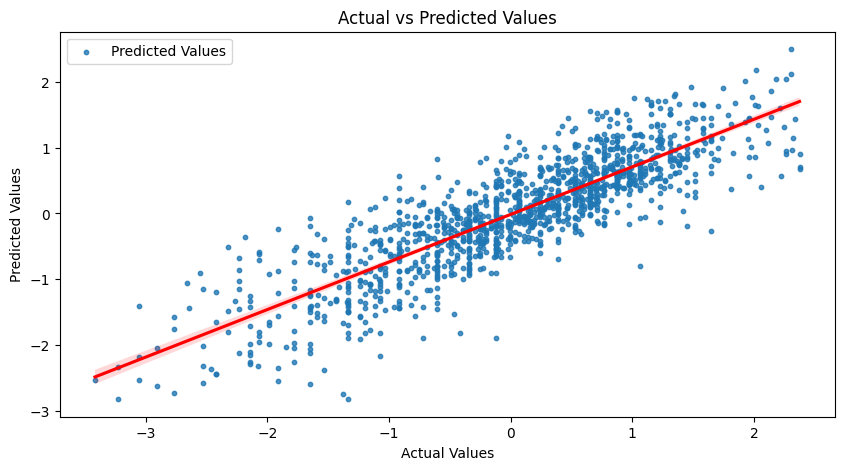

In [212]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.3)
ridge_model.fit(X_train,y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression (alpha : {ridge_model.alpha}) - MSE: {mse_ridge}, R2: {r2_ridge}")

# print(ridge_model.score(X_train, y_train))
# print(ridge_model.score(X_test, y_test))

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge})

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
sns.regplot(x='Actual', y='Predicted', data=results, scatter_kws={'s': 10},line_kws={"color": "red"} , label='Predicted Values')
# plt.plot([min(results['Actual']), max(results['Actual'])], [min(results['Actual']), max(results['Actual'])], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

#### Lasso Regression

Lasso Regression (alpha : 0.0001) - MSE: 0.2786592419045395, R2: 0.7290714559951874


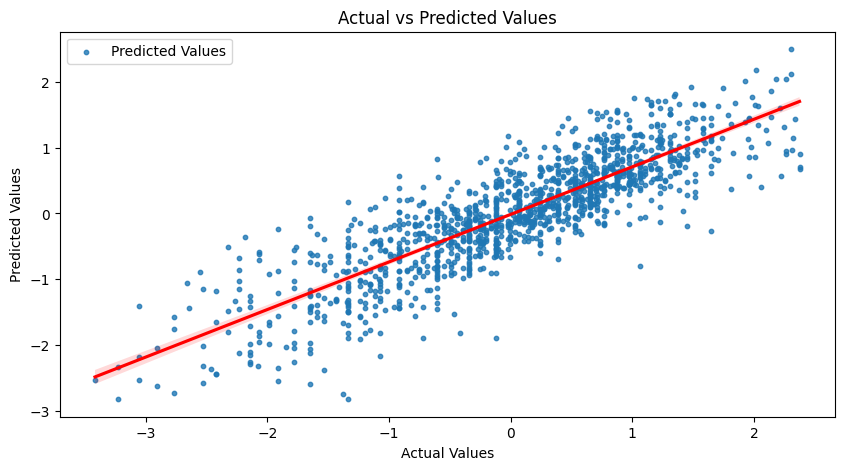

In [204]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.0001)
lasso_model.fit(X_train,y_train)

y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression (alpha : {lasso_model.alpha}) - MSE: {mse_lasso}, R2: {r2_lasso}")

# print(lasso_model.score(X_train, y_train))
# print(lasso_model.score(X_test, y_test))

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lasso})

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
sns.regplot(x='Actual', y='Predicted', data=results, scatter_kws={'s': 10},line_kws={"color": "red"} , label='Predicted Values')
# plt.plot([min(results['Actual']), max(results['Actual'])], [min(results['Actual']), max(results['Actual'])], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()



#### Elastic Regression

Elastic Regression (alpha : 0.0001 , l1_ratio : 0.1) - MSE: 0.2786483922279192, R2: 0.7290820046748925
0.7313028867204119
0.7290820046748925


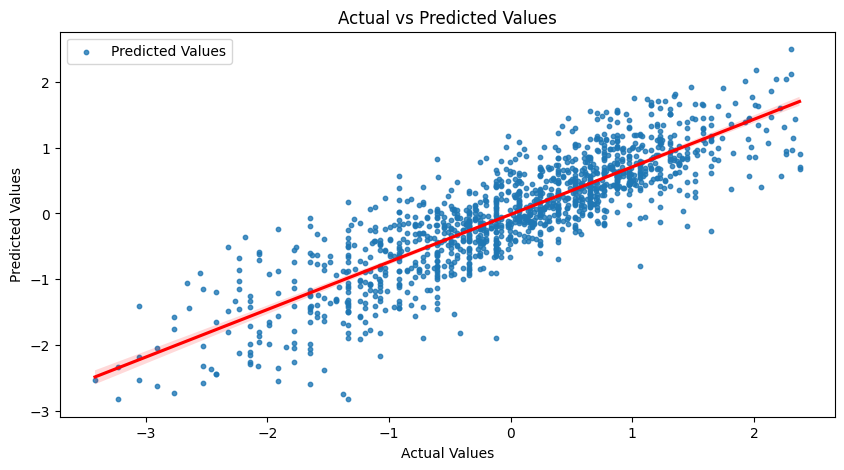

In [211]:
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet(alpha=0.0001,l1_ratio=0.1)
elastic_model.fit(X_train,y_train)

y_pred_elastic = elastic_model.predict(X_test)

mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print(f"Elastic Regression (alpha : {elastic_model.alpha} , l1_ratio : {elastic_model.l1_ratio}) - MSE: {mse_elastic}, R2: {r2_elastic}")

print(elastic_model.score(X_train, y_train))
print(elastic_model.score(X_test, y_test))

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_elastic})

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
sns.regplot(x='Actual', y='Predicted', data=results, scatter_kws={'s': 10},line_kws={"color": "red"} , label='Predicted Values')
# plt.plot([min(results['Actual']), max(results['Actual'])], [min(results['Actual']), max(results['Actual'])], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()



#### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
alphas = [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
l1_ratios = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

print("-------------------------------------------------------------------------------------------------------------------")
params_dict_ridge = [{'alpha': alpha} for alpha in alphas]

ridge_models = [Ridge(alpha=params['alpha']) for params in params_dict_ridge]

cv_scores = [cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean() for model in ridge_models]

best_model_index = np.argmax(cv_scores)
best_model_params = params_dict_ridge[best_model_index]
print("cross_val_score Ridge : \n===============================")
print("Best Parameters:", best_model_params)
print("Best R2 Score:", cv_scores[best_model_index])

print("-------------------------------------------------------------------------------------------------------------------")
params_dict_lasso = [{'alpha': alpha} for alpha in alphas]

lasso_models = [ElasticNet(alpha=params['alpha']) for params in params_dict_lasso]

cv_scores = [cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean() for model in lasso_models]

best_model_index = np.argmax(cv_scores)
best_model_params = params_dict_lasso[best_model_index]
print("cross_val_score Lasso: \n===============================")
print("Best Parameters:", best_model_params)
print("Best R2 Score:", cv_scores[best_model_index])

print("-------------------------------------------------------------------------------------------------------------------")
params_dict_elastic = [{'alpha': alpha, 'l1_ratio': l1_ratio} for alpha in alphas for l1_ratio in l1_ratios]

elastic_models = [ElasticNet(alpha=params['alpha'], l1_ratio=params['l1_ratio']) for params in params_dict_elastic]

cv_scores = [cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean() for model in elastic_models]

best_model_index = np.argmax(cv_scores)
best_model_params = params_dict_elastic[best_model_index]
print("cross_val_score ElasticNet : \n===============================")
print("Best Parameters:", best_model_params)
print("Best R2 Score:", cv_scores[best_model_index])

print("-------------------------------------------------------------------------------------------------------------------")

-------------------------------------------------------------------------------------------------------------------
cross_val_score Ridge : 
Best Parameters: {'alpha': 1}
Best R2 Score: 0.7291688362353692
-------------------------------------------------------------------------------------------------------------------
cross_val_score Lasso: 
Best Parameters: {'alpha': 0.001}
Best R2 Score: 0.7291705598896787
-------------------------------------------------------------------------------------------------------------------
cross_val_score ElasticNet : 
Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.1}
Best R2 Score: 0.7291716517451944
-------------------------------------------------------------------------------------------------------------------
